In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [3]:
df.shape

(3893, 9)

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [7]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [9]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Length,8.0,0.873656,0.140194,0.554973,0.879072,0.900717,0.940693,1.0
Diameter,8.0,0.876849,0.133791,0.573844,0.877602,0.902686,0.940991,1.0
Height,8.0,0.799437,0.121992,0.551956,0.787694,0.813348,0.824694,1.0
Weight,8.0,0.886787,0.151099,0.538819,0.897631,0.940519,0.966457,1.0
Shucked Weight,8.0,0.845536,0.185402,0.418760,0.854545,0.895903,0.940729,1.0
Viscera Weight,8.0,0.862579,0.157868,0.501328,0.873176,0.904679,0.939856,1.0
Shell Weight,8.0,0.873070,0.113921,0.625195,0.864877,0.901649,0.918396,1.0
Age,8.0,0.595609,0.173957,0.418760,0.529447,0.553465,0.586682,1.0


In [10]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             1.311306
Diameter           1.020893
Height             0.349374
Weight            23.567275
Shucked Weight    10.207342
Viscera Weight     5.136546
Shell Weight       6.795844
Age                9.954791
dtype: float64

In [11]:
df.min()

Sex                      F
Length              0.1875
Diameter            0.1375
Height                 0.0
Weight            0.056699
Shucked Weight    0.028349
Viscera Weight    0.014175
Shell Weight      0.042524
Age                      1
dtype: object

In [12]:
df.max()

Sex                       M
Length               2.0375
Diameter              1.625
Height                2.825
Weight            80.101512
Shucked Weight    42.184056
Viscera Weight     21.54562
Shell Weight      28.491248
Age                      29
dtype: object

In [16]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Sex" is
 M    1435
I    1233
F    1225
Name: Sex, dtype: int64
-------------------------------------------------
unique values in column "Length" is
 1.5625    91
1.3750    90
1.4500    89
1.4375    84
1.5000    83
          ..
0.1875     1
0.3750     1
2.0375     1
2.0000     1
0.3375     1
Name: Length, Length: 134, dtype: int64
-------------------------------------------------
unique values in column "Diameter" is
 1.1250    131
1.1875    112
1.0000    104
1.2500     98
1.1750     91
         ... 
1.6250      1
0.1375      1
1.5250      1
0.2250      1
1.5625      1
Name: Diameter, Length: 111, dtype: int64
-------------------------------------------------
unique values in column "Height" is
 0.3750    247
0.3875    210
0.3500    200
0.4375    194
0.4000    193
0.4125    186
0.3125    186
0.3375    178
0.3625    172
0.3250    162
0.3000    157
0.4250    152
0.2500    129
0.2875    123
0.4500    123
0.2750    120
0.2250    116
0.2625    107
0.4625     96
0.47

In [17]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length           -0.651111
Diameter         -0.617403
Height            3.314345
Weight            0.518903
Shucked Weight    0.703114
Viscera Weight    0.578290
Shell Weight      0.607716
Age               1.104710
dtype: float64

In [14]:
x=df.drop(['Sex'],axis='columns')
y=df.Sex.values

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

47.85958904109589

In [19]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           F       0.39      0.42      0.40       360
           I       0.61      0.63      0.62       356
           M       0.45      0.40      0.42       452

    accuracy                           0.48      1168
   macro avg       0.48      0.49      0.48      1168
weighted avg       0.48      0.48      0.48      1168



In [21]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


52.82534246575342

In [22]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           F       0.43      0.31      0.36       360
           I       0.65      0.80      0.72       356
           M       0.46      0.48      0.47       452

    accuracy                           0.53      1168
   macro avg       0.52      0.53      0.52      1168
weighted avg       0.51      0.53      0.52      1168



In [23]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

52.054794520547944

In [24]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           F       0.42      0.49      0.45       360
           I       0.67      0.72      0.69       356
           M       0.48      0.39      0.43       452

    accuracy                           0.52      1168
   macro avg       0.52      0.53      0.52      1168
weighted avg       0.52      0.52      0.52      1168



In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

55.650684931506845

In [27]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           F       0.53      0.33      0.40       360
           I       0.64      0.80      0.71       356
           M       0.50      0.55      0.52       452

    accuracy                           0.56      1168
   macro avg       0.55      0.56      0.54      1168
weighted avg       0.55      0.56      0.54      1168



In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

51.11301369863014

In [30]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           F       0.38      0.42      0.40       360
           I       0.68      0.72      0.70       356
           M       0.48      0.42      0.45       452

    accuracy                           0.51      1168
   macro avg       0.51      0.52      0.52      1168
weighted avg       0.51      0.51      0.51      1168



In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

51.11301369863014

In [33]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           F       0.44      0.56      0.49       360
           I       0.61      0.80      0.69       356
           M       0.45      0.25      0.32       452

    accuracy                           0.51      1168
   macro avg       0.50      0.53      0.50      1168
weighted avg       0.50      0.51      0.49      1168



In [34]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

53.42465753424658

In [36]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

           F       0.44      0.42      0.43       360
           I       0.70      0.76      0.73       356
           M       0.46      0.44      0.45       452

    accuracy                           0.53      1168
   macro avg       0.53      0.54      0.54      1168
weighted avg       0.53      0.53      0.53      1168



In [37]:
from sklearn.svm import SVC

In [38]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

53.51027397260274

In [39]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

           F       0.47      0.20      0.28       360
           I       0.63      0.80      0.71       356
           M       0.47      0.59      0.52       452

    accuracy                           0.54      1168
   macro avg       0.53      0.53      0.51      1168
weighted avg       0.52      0.54      0.51      1168



In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

53.76712328767124

In [42]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           F       0.43      0.43      0.43       360
           I       0.70      0.76      0.73       356
           M       0.48      0.44      0.46       452

    accuracy                           0.54      1168
   macro avg       0.54      0.55      0.54      1168
weighted avg       0.53      0.54      0.53      1168



In [43]:
from catboost import CatBoostClassifier

In [44]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.083277
0:	learn: 1.0658427	total: 530ms	remaining: 8m 49s
1:	learn: 1.0388240	total: 545ms	remaining: 4m 31s
2:	learn: 1.0153038	total: 553ms	remaining: 3m 3s
3:	learn: 0.9970754	total: 560ms	remaining: 2m 19s
4:	learn: 0.9810839	total: 569ms	remaining: 1m 53s
5:	learn: 0.9644852	total: 577ms	remaining: 1m 35s
6:	learn: 0.9499558	total: 584ms	remaining: 1m 22s
7:	learn: 0.9371958	total: 592ms	remaining: 1m 13s
8:	learn: 0.9263120	total: 599ms	remaining: 1m 5s
9:	learn: 0.9170237	total: 606ms	remaining: 60s
10:	learn: 0.9098256	total: 613ms	remaining: 55.1s
11:	learn: 0.9013793	total: 620ms	remaining: 51.1s
12:	learn: 0.8957426	total: 627ms	remaining: 47.6s
13:	learn: 0.8907082	total: 634ms	remaining: 44.6s
14:	learn: 0.8858016	total: 641ms	remaining: 42.1s
15:	learn: 0.8790882	total: 648ms	remaining: 39.8s
16:	learn: 0.8746825	total: 655ms	remaining: 37.9s
17:	learn: 0.8695278	total: 663ms	remaining: 36.2s
18:	learn: 0.8659047	total: 670ms	remaining: 34.6s
19:	le

181:	learn: 0.7275327	total: 1.95s	remaining: 8.77s
182:	learn: 0.7269378	total: 1.96s	remaining: 8.75s
183:	learn: 0.7261295	total: 1.97s	remaining: 8.73s
184:	learn: 0.7256452	total: 1.98s	remaining: 8.71s
185:	learn: 0.7254522	total: 1.99s	remaining: 8.69s
186:	learn: 0.7252603	total: 1.99s	remaining: 8.66s
187:	learn: 0.7247404	total: 2s	remaining: 8.64s
188:	learn: 0.7242403	total: 2.01s	remaining: 8.61s
189:	learn: 0.7235965	total: 2.02s	remaining: 8.59s
190:	learn: 0.7227987	total: 2.02s	remaining: 8.57s
191:	learn: 0.7223267	total: 2.03s	remaining: 8.55s
192:	learn: 0.7213455	total: 2.04s	remaining: 8.52s
193:	learn: 0.7211884	total: 2.04s	remaining: 8.5s
194:	learn: 0.7202586	total: 2.05s	remaining: 8.48s
195:	learn: 0.7193788	total: 2.06s	remaining: 8.45s
196:	learn: 0.7189062	total: 2.07s	remaining: 8.43s
197:	learn: 0.7179954	total: 2.07s	remaining: 8.4s
198:	learn: 0.7173178	total: 2.08s	remaining: 8.38s
199:	learn: 0.7167350	total: 2.09s	remaining: 8.36s
200:	learn: 0.716

345:	learn: 0.6311876	total: 3.18s	remaining: 6.01s
346:	learn: 0.6307904	total: 3.19s	remaining: 6s
347:	learn: 0.6303984	total: 3.2s	remaining: 5.99s
348:	learn: 0.6297207	total: 3.21s	remaining: 5.98s
349:	learn: 0.6293824	total: 3.21s	remaining: 5.97s
350:	learn: 0.6292337	total: 3.22s	remaining: 5.96s
351:	learn: 0.6286702	total: 3.23s	remaining: 5.94s
352:	learn: 0.6283006	total: 3.24s	remaining: 5.93s
353:	learn: 0.6275569	total: 3.24s	remaining: 5.92s
354:	learn: 0.6269292	total: 3.25s	remaining: 5.91s
355:	learn: 0.6266762	total: 3.26s	remaining: 5.89s
356:	learn: 0.6263989	total: 3.27s	remaining: 5.88s
357:	learn: 0.6258052	total: 3.27s	remaining: 5.87s
358:	learn: 0.6255076	total: 3.28s	remaining: 5.86s
359:	learn: 0.6251663	total: 3.29s	remaining: 5.84s
360:	learn: 0.6246677	total: 3.29s	remaining: 5.83s
361:	learn: 0.6241156	total: 3.3s	remaining: 5.82s
362:	learn: 0.6234132	total: 3.31s	remaining: 5.8s
363:	learn: 0.6227347	total: 3.32s	remaining: 5.8s
364:	learn: 0.62245

519:	learn: 0.5569891	total: 4.58s	remaining: 4.23s
520:	learn: 0.5565657	total: 4.59s	remaining: 4.22s
521:	learn: 0.5562880	total: 4.59s	remaining: 4.21s
522:	learn: 0.5560483	total: 4.61s	remaining: 4.2s
523:	learn: 0.5554982	total: 4.62s	remaining: 4.19s
524:	learn: 0.5552873	total: 4.62s	remaining: 4.18s
525:	learn: 0.5549820	total: 4.63s	remaining: 4.17s
526:	learn: 0.5547480	total: 4.64s	remaining: 4.17s
527:	learn: 0.5542182	total: 4.65s	remaining: 4.16s
528:	learn: 0.5538362	total: 4.66s	remaining: 4.15s
529:	learn: 0.5535718	total: 4.67s	remaining: 4.14s
530:	learn: 0.5528729	total: 4.68s	remaining: 4.13s
531:	learn: 0.5524453	total: 4.68s	remaining: 4.12s
532:	learn: 0.5523346	total: 4.69s	remaining: 4.11s
533:	learn: 0.5521198	total: 4.7s	remaining: 4.1s
534:	learn: 0.5517229	total: 4.71s	remaining: 4.09s
535:	learn: 0.5514956	total: 4.71s	remaining: 4.08s
536:	learn: 0.5513100	total: 4.72s	remaining: 4.07s
537:	learn: 0.5509223	total: 4.73s	remaining: 4.06s
538:	learn: 0.5

687:	learn: 0.4987480	total: 5.97s	remaining: 2.71s
688:	learn: 0.4982816	total: 5.98s	remaining: 2.7s
689:	learn: 0.4978938	total: 5.99s	remaining: 2.69s
690:	learn: 0.4973171	total: 6s	remaining: 2.68s
691:	learn: 0.4969999	total: 6.01s	remaining: 2.67s
692:	learn: 0.4965693	total: 6.02s	remaining: 2.67s
693:	learn: 0.4961668	total: 6.03s	remaining: 2.66s
694:	learn: 0.4958277	total: 6.03s	remaining: 2.65s
695:	learn: 0.4953727	total: 6.04s	remaining: 2.64s
696:	learn: 0.4950712	total: 6.05s	remaining: 2.63s
697:	learn: 0.4949020	total: 6.05s	remaining: 2.62s
698:	learn: 0.4946971	total: 6.06s	remaining: 2.61s
699:	learn: 0.4940607	total: 6.07s	remaining: 2.6s
700:	learn: 0.4936628	total: 6.08s	remaining: 2.59s
701:	learn: 0.4933713	total: 6.08s	remaining: 2.58s
702:	learn: 0.4929919	total: 6.09s	remaining: 2.57s
703:	learn: 0.4926551	total: 6.1s	remaining: 2.56s
704:	learn: 0.4925052	total: 6.11s	remaining: 2.56s
705:	learn: 0.4919647	total: 6.11s	remaining: 2.55s
706:	learn: 0.4915

865:	learn: 0.4437028	total: 7.42s	remaining: 1.15s
866:	learn: 0.4432419	total: 7.43s	remaining: 1.14s
867:	learn: 0.4430564	total: 7.43s	remaining: 1.13s
868:	learn: 0.4428841	total: 7.44s	remaining: 1.12s
869:	learn: 0.4424247	total: 7.45s	remaining: 1.11s
870:	learn: 0.4420347	total: 7.46s	remaining: 1.1s
871:	learn: 0.4415929	total: 7.47s	remaining: 1.1s
872:	learn: 0.4414424	total: 7.48s	remaining: 1.09s
873:	learn: 0.4410382	total: 7.49s	remaining: 1.08s
874:	learn: 0.4407394	total: 7.49s	remaining: 1.07s
875:	learn: 0.4404285	total: 7.5s	remaining: 1.06s
876:	learn: 0.4402282	total: 7.51s	remaining: 1.05s
877:	learn: 0.4398184	total: 7.51s	remaining: 1.04s
878:	learn: 0.4394037	total: 7.52s	remaining: 1.03s
879:	learn: 0.4389975	total: 7.53s	remaining: 1.03s
880:	learn: 0.4387429	total: 7.54s	remaining: 1.02s
881:	learn: 0.4385159	total: 7.54s	remaining: 1.01s
882:	learn: 0.4382041	total: 7.55s	remaining: 1s
883:	learn: 0.4379090	total: 7.56s	remaining: 992ms
884:	learn: 0.4376

In [45]:
cat.score(xtest,ytest)*100

54.28082191780822

In [47]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,AdaBoostClassifier,55.650685
6,AdaBoostClassifier,55.650685
9,RandomForestClassifier,53.767123
8,SVM,53.510274
7,ExtraTreesClassifier,53.424658
0,LogisticRegression,52.825342
2,KNeighborsClassifier,52.054795
4,BaggingClassifier,51.113014
5,GaussianNB,51.113014
1,DecisionTreeClassifier,47.859589


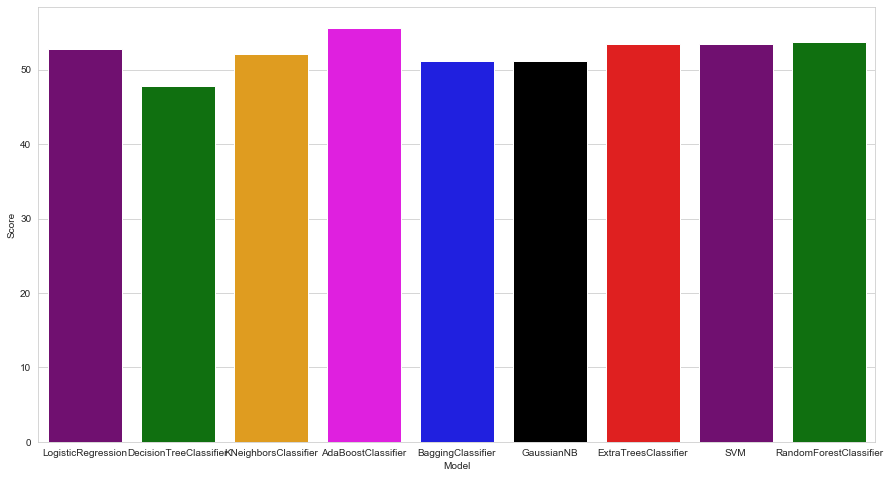

In [49]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

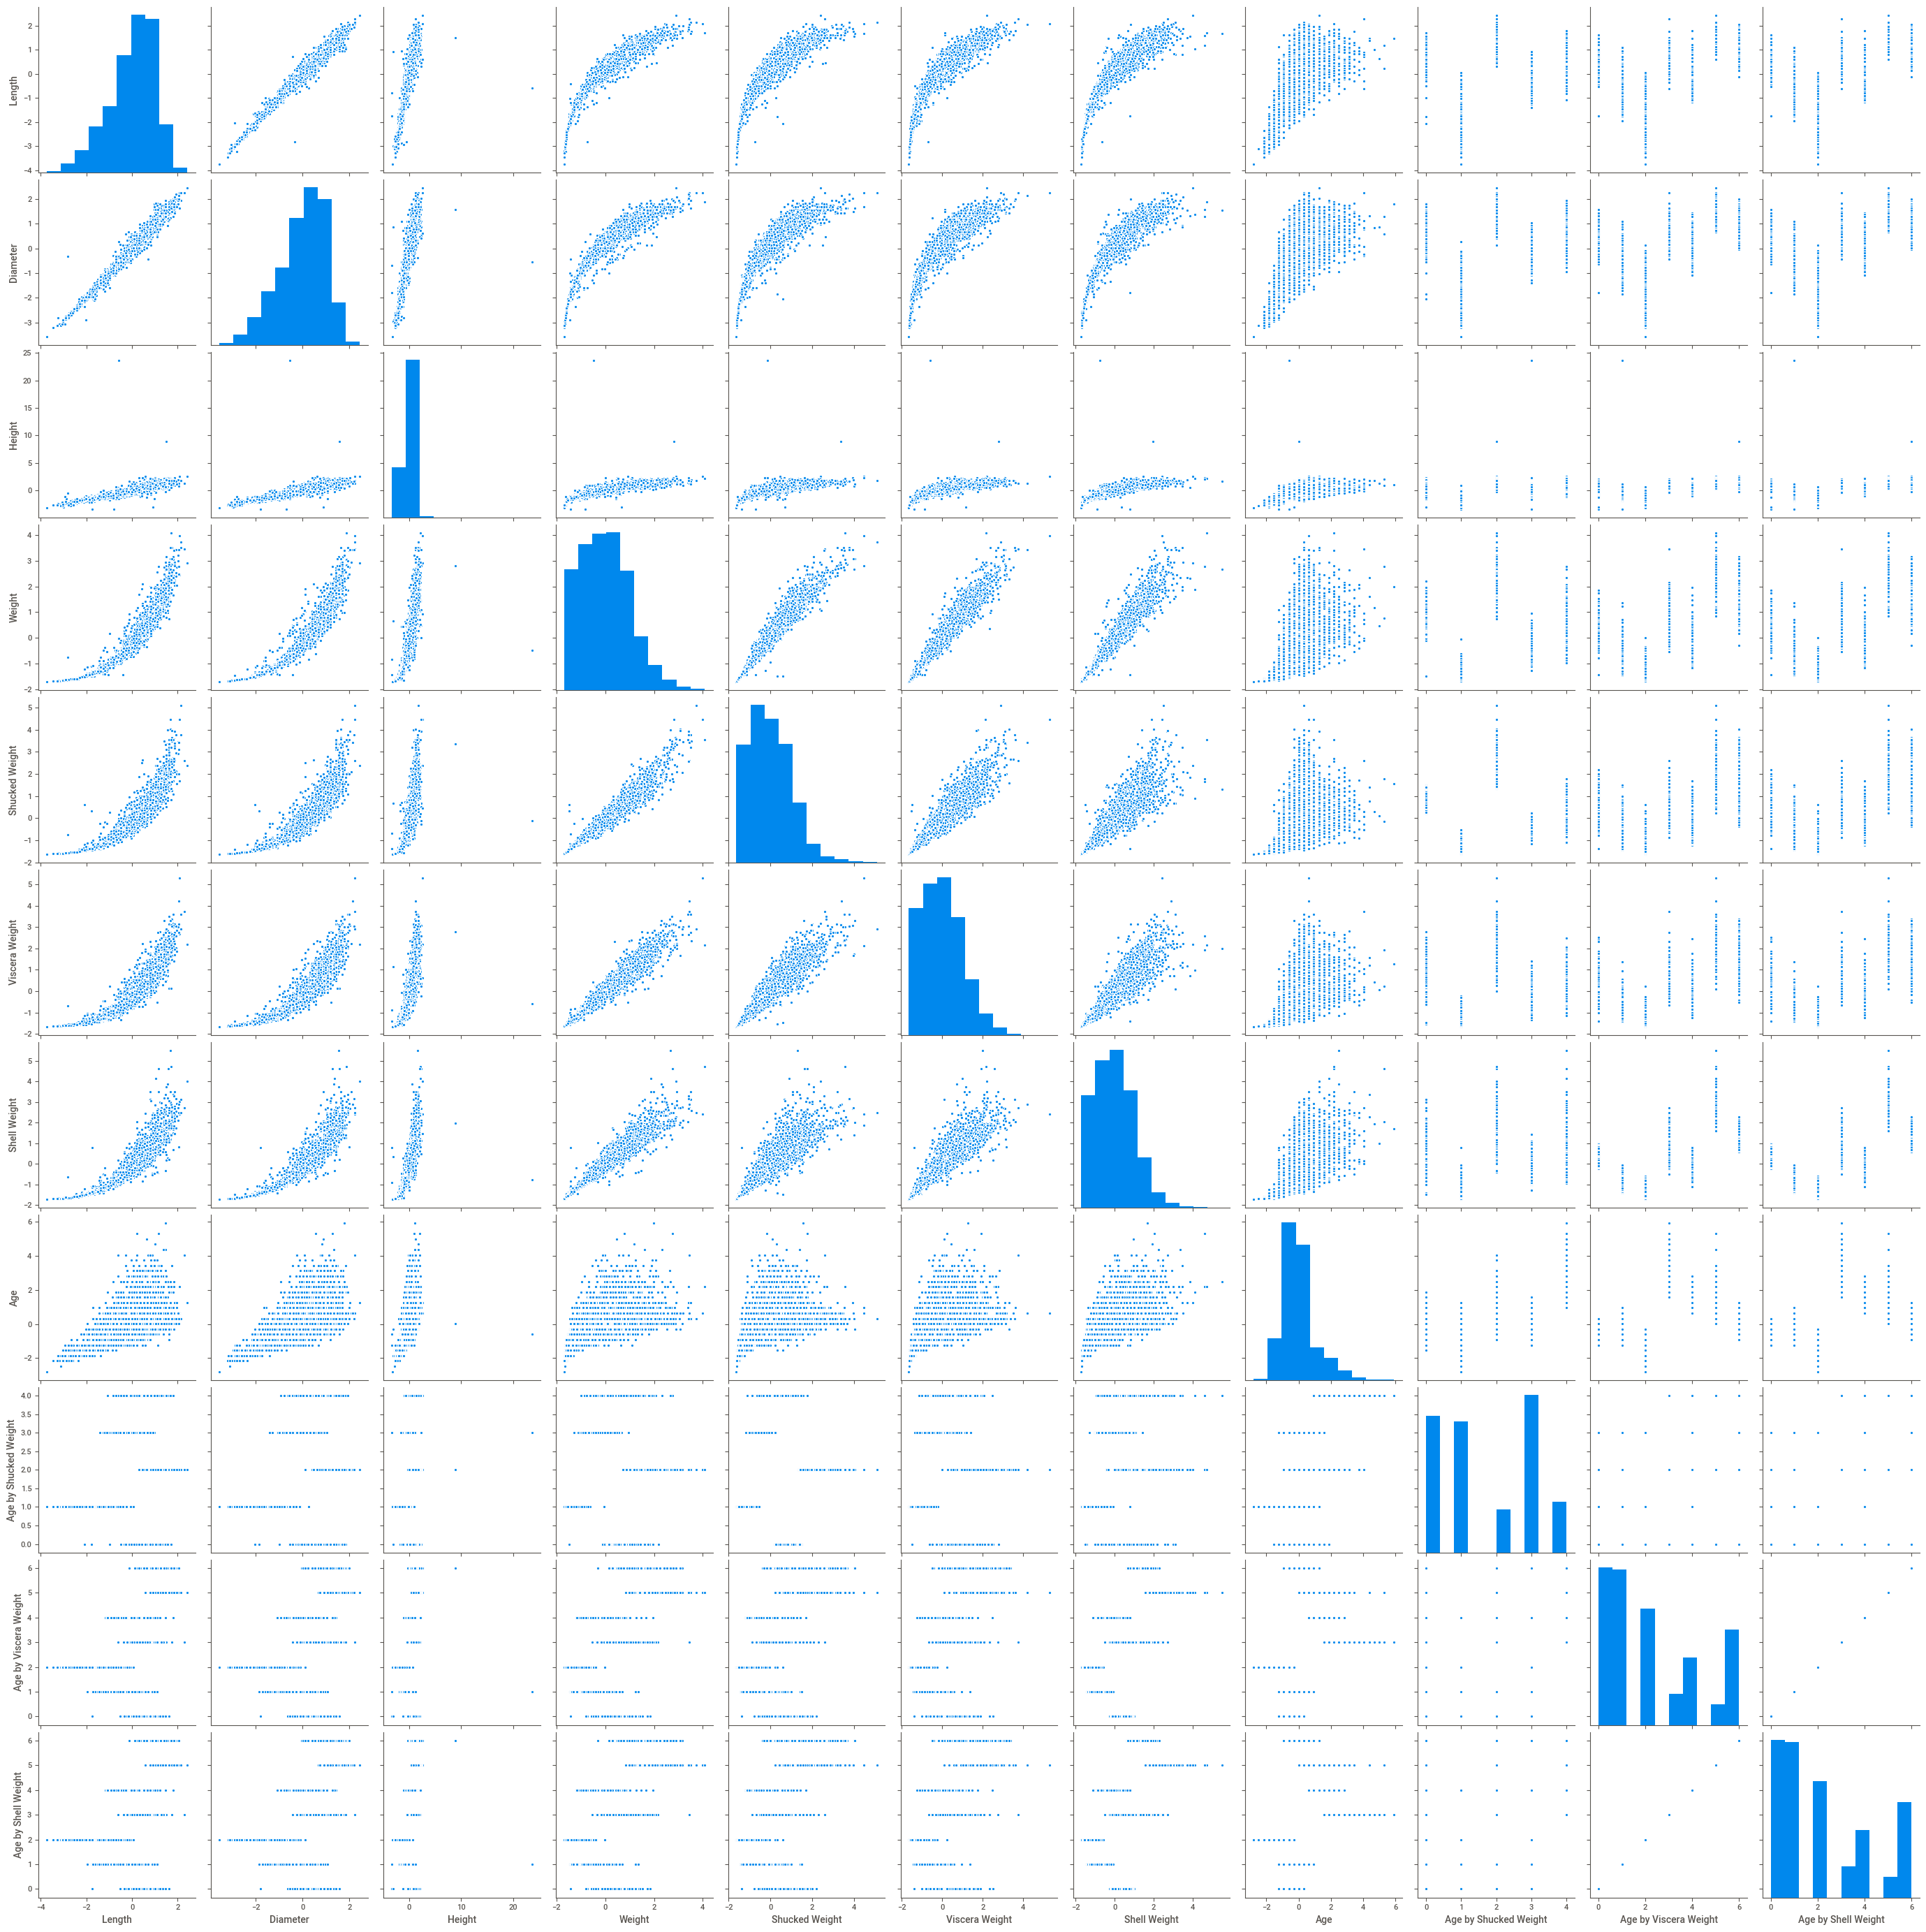

In [128]:
sns.pairplot(df)

In [50]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [51]:
import sklearn.cluster as cluster

In [52]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['Age','Shucked Weight']])

In [53]:
kmns.cluster_centers_

array([[10.15166341, 15.00630297],
       [ 7.0010142 ,  3.03171451],
       [11.62893082, 23.2071414 ],
       [ 9.66385135,  8.26450179],
       [16.54308094, 11.0872822 ]])

In [54]:
df['Age by Shucked Weight']=kmns.labels_

In [55]:
from sklearn.cluster import KMeans 

In [56]:
k_range=range(1,15)
wss=[]

In [57]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Shucked Weight']])
    wss.append(km.inertia_)

In [58]:
wss

[193641.39225811366,
 86634.32121723745,
 58659.18905774216,
 45559.886605698186,
 34561.519762757605,
 28505.53368833341,
 24216.808622777382,
 21044.29788483309,
 19003.801338422098,
 17190.450932678574,
 15461.118834997214,
 14086.60666080709,
 13113.147476506765,
 12220.645839758612]

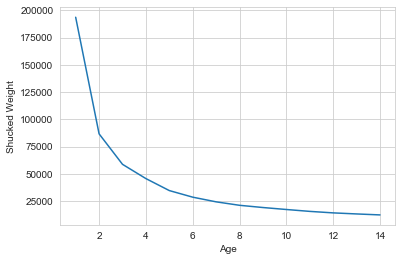

In [62]:
plt.xlabel('Age')
plt.ylabel('Shucked Weight')
plt.plot(k_range,wss)

In [66]:
kmns=cluster.KMeans(n_clusters=7)
kmns=kmns.fit(df[['Age','Viscera Weight']])

In [67]:
kmns.cluster_centers_

array([[ 9.32195122,  5.44752929],
       [10.27355623,  8.15138602],
       [ 6.03377386,  1.34674695],
       [18.68717949,  7.33430641],
       [13.56512605,  5.12720957],
       [11.84074074, 11.59867293],
       [ 8.75535939,  2.83287652]])

In [68]:
df['Age by Viscera Weight']=kmns.labels_

In [73]:
k_range=range(1,21)
wss=[]

In [74]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Viscera Weight']])
    wss.append(km.inertia_)

In [75]:
wss

[77879.96261890324,
 40025.28544132521,
 27515.611521994477,
 19694.433195105037,
 16274.400589163033,
 13231.752048299266,
 11566.991206170947,
 10244.883224247706,
 9181.105924014078,
 8341.022429510476,
 7738.168246357046,
 7131.496858110069,
 6621.871370965121,
 6140.845284962406,
 5671.024869483298,
 5366.447372135159,
 5135.560183641252,
 4766.391709860778,
 4449.018784941621,
 4266.702200373566]

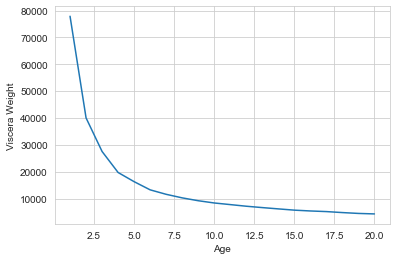

In [76]:
plt.xlabel('Age')
plt.ylabel('Viscera Weight')
plt.plot(k_range,wss)

In [77]:
kmns=cluster.KMeans(n_clusters=7)
kmns=kmns.fit(df[['Age','Shell Weight']])

In [78]:
kmns.cluster_centers_

array([[ 9.49526814,  7.91840884],
       [ 8.82340426,  4.31393437],
       [ 6.14164306,  1.79519394],
       [18.2962963 , 10.74131056],
       [13.5       ,  6.91790644],
       [14.2983871 , 16.83983162],
       [11.06065858, 11.57087053]])

In [81]:
df['Age by Shell Weight']=kmns.labels_

In [82]:
k_range=range(1,21)
wss=[]

In [83]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Shell Weight']])
    wss.append(km.inertia_)

In [84]:
wss

[100899.95784778727,
 48082.423867273,
 33282.29156275839,
 25684.601006509056,
 20736.71771948919,
 16954.265151063235,
 14688.840380793026,
 12850.262867707872,
 11509.277753448554,
 10610.276279638863,
 9655.862334304453,
 8913.41294775297,
 8216.760429316762,
 7671.254518174543,
 7173.130512654342,
 6733.818053371883,
 6332.429745855758,
 6023.8530464665,
 5711.916726309088,
 5501.5878170136075]

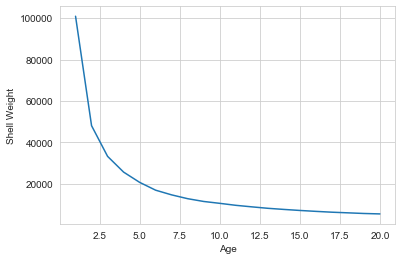

In [85]:
plt.xlabel('Age')
plt.ylabel('Shell Weight')
plt.plot(k_range,wss)

In [86]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Age by Shucked Weight,Age by Viscera Weight,Age by Shell Weight
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0,0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,1,2,2
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,2,2
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,1,1
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,2,2


In [87]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Age by Shucked Weight',
       'Age by Viscera Weight', 'Age by Shell Weight'],
      dtype='object')

In [88]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [89]:
object_col

['Sex']

In [90]:
num_col

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Age',
 'Age by Shucked Weight',
 'Age by Viscera Weight',
 'Age by Shell Weight']

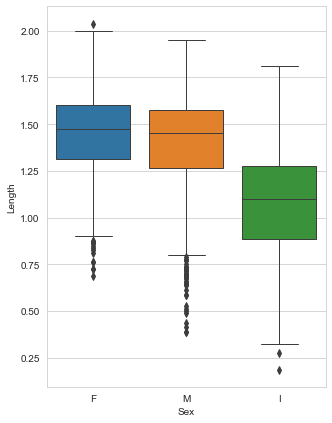

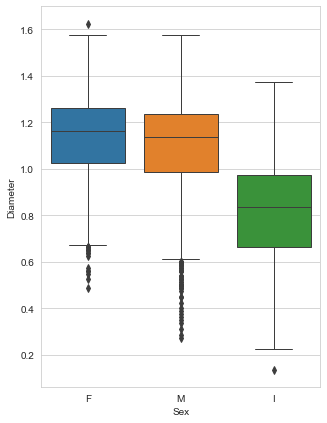

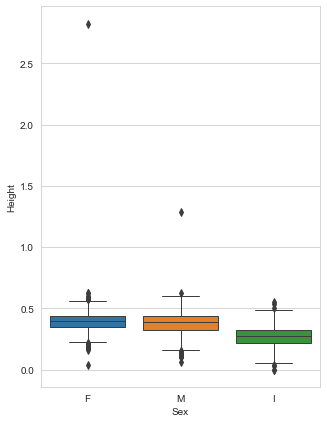

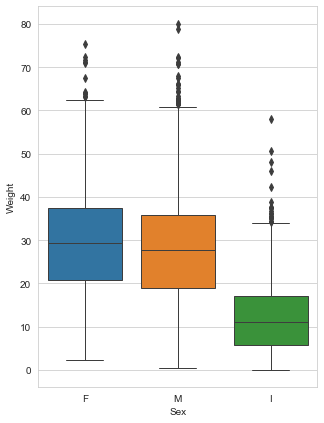

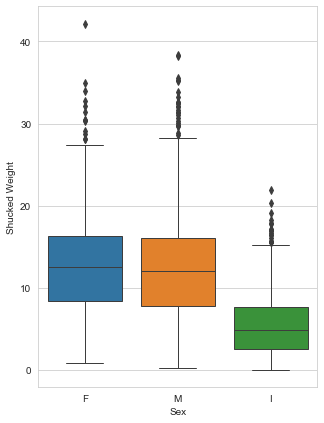

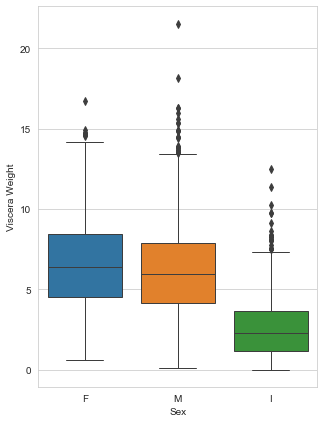

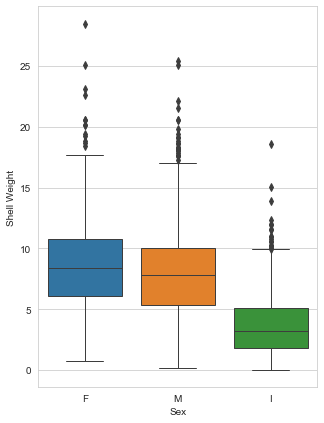

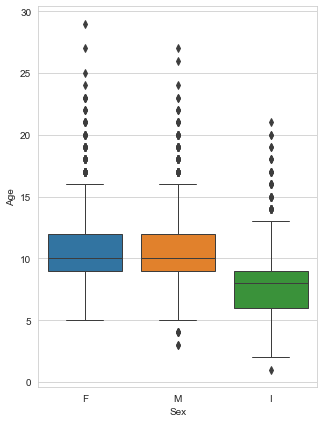

In [91]:
for i in ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=df.Sex,y=df[i],data=df,linewidth=1)
    plt.show()

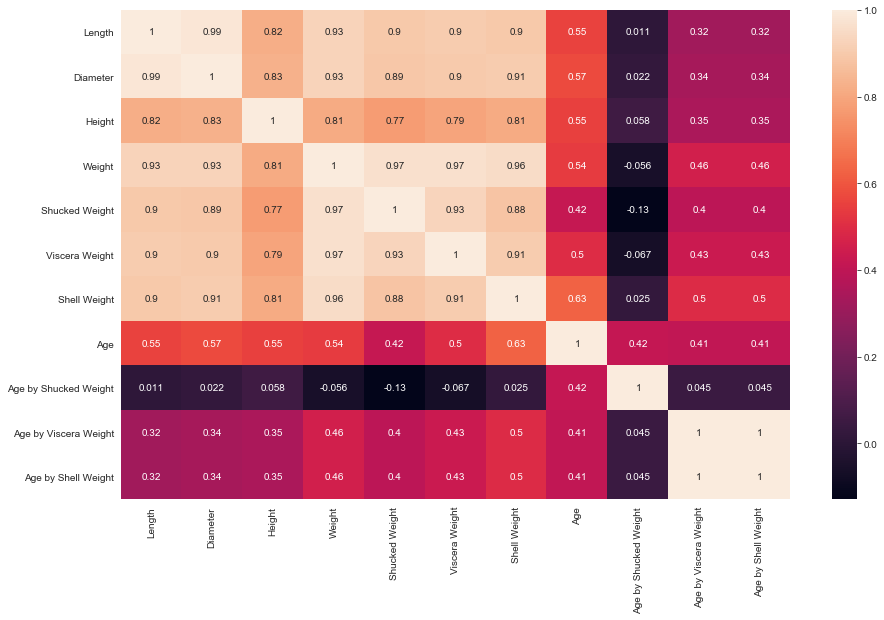

In [97]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

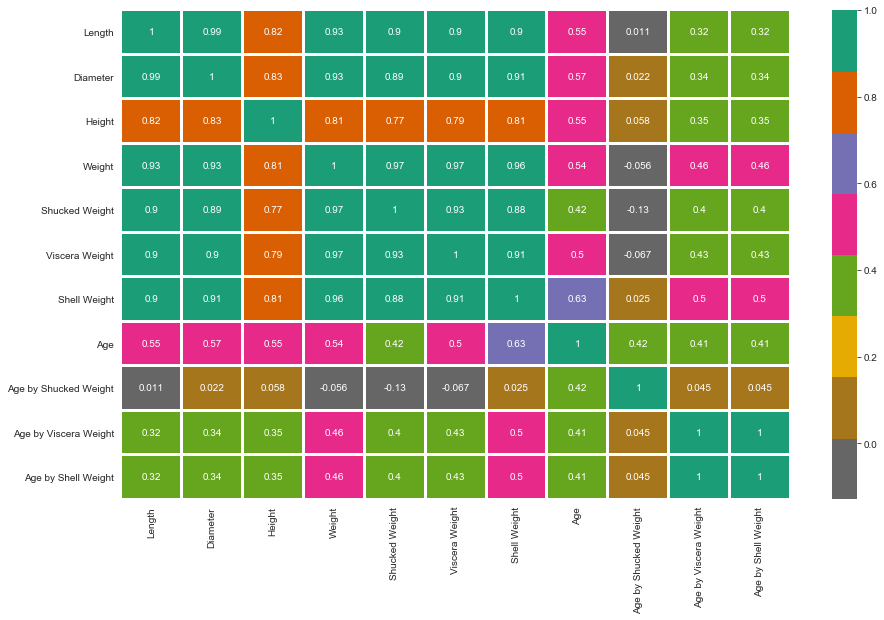

In [102]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

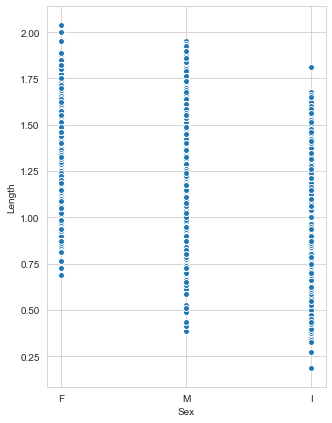

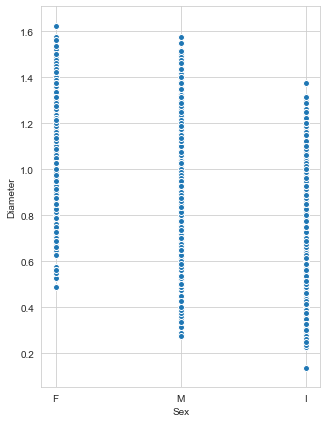

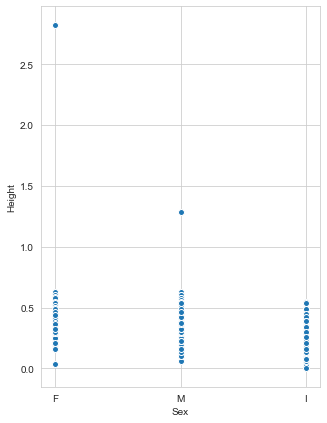

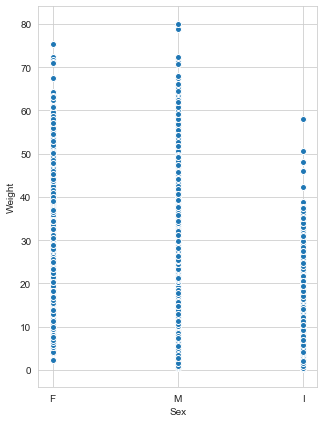

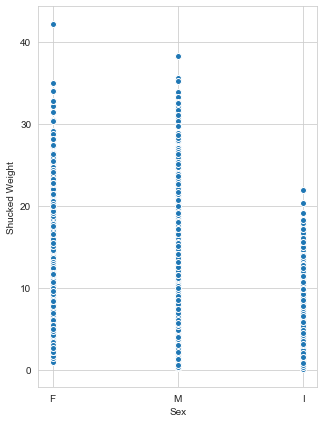

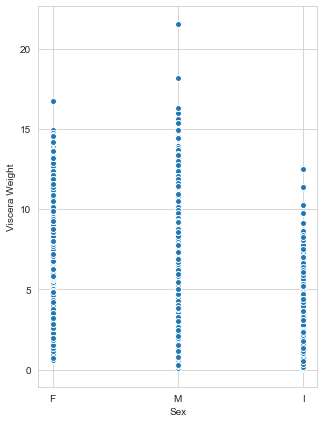

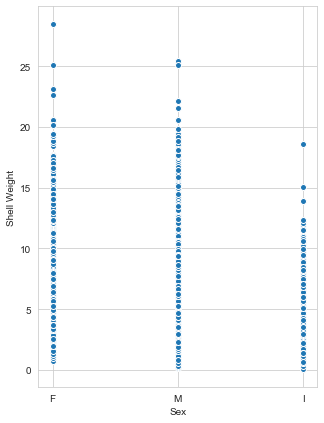

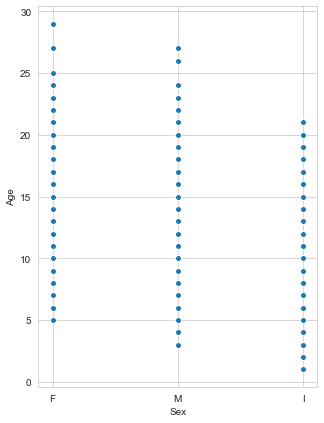

In [103]:
for i in ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']:
    plt.figure(figsize=(5,7))
    sns.scatterplot(x=df.Sex,y=df[i],data=df,linewidth=1)
    plt.show()

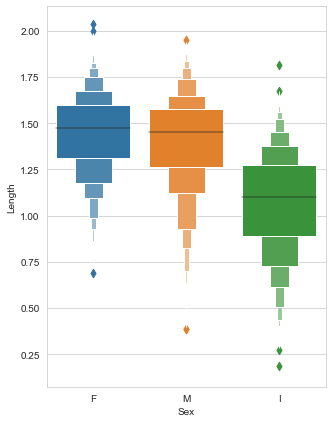

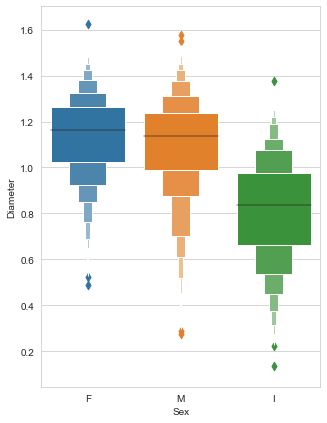

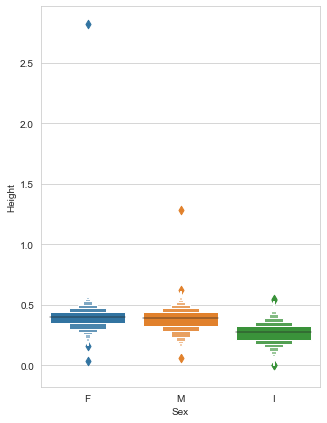

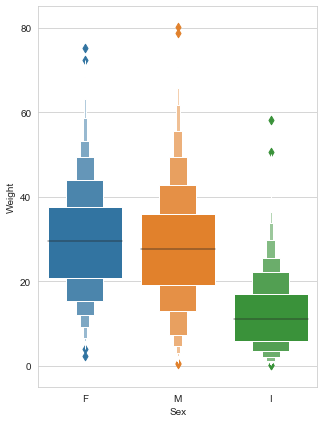

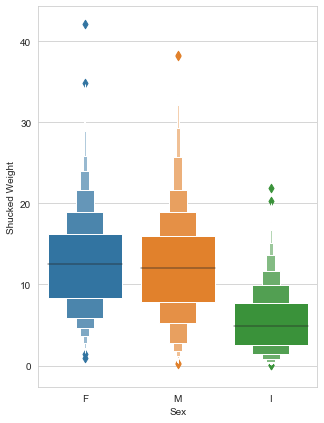

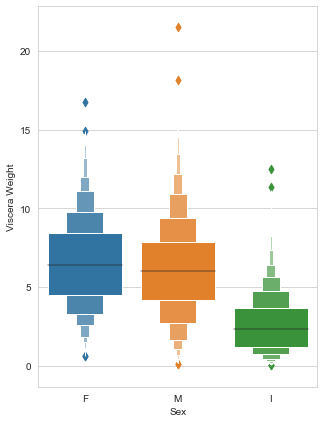

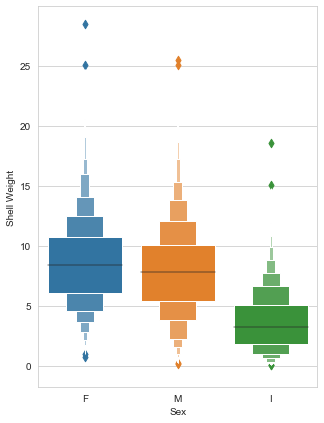

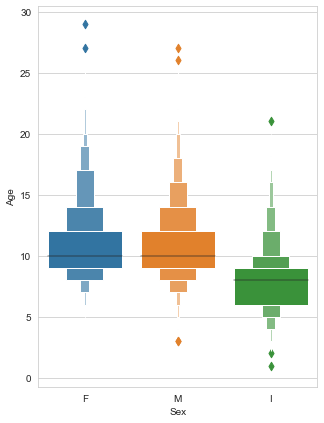

In [104]:
for i in ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']:
    plt.figure(figsize=(5,7))
    sns.boxenplot(x=df.Sex,y=df[i],data=df,linewidth=1)
    plt.show()

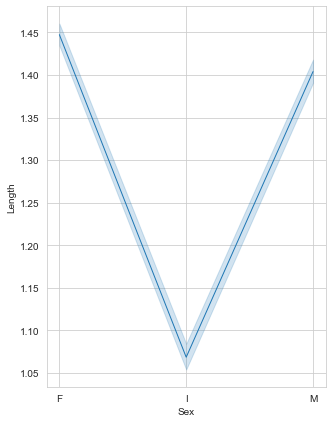

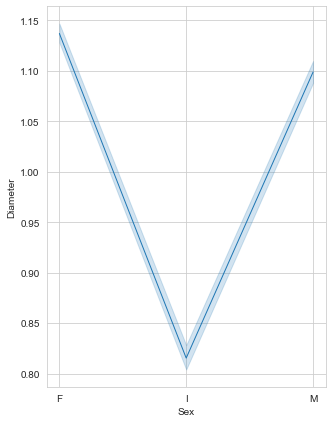

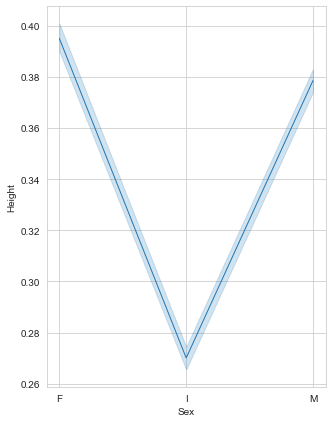

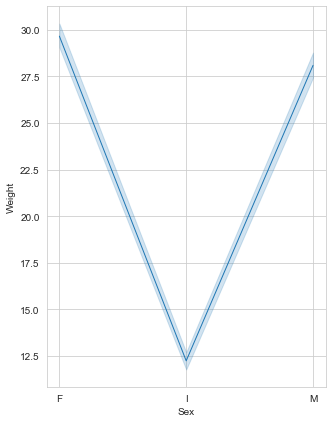

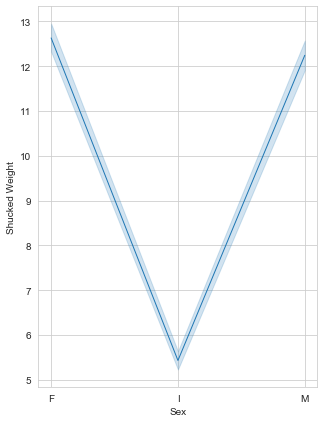

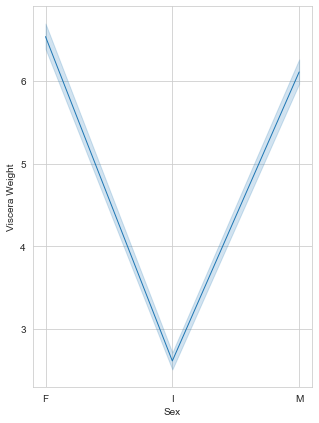

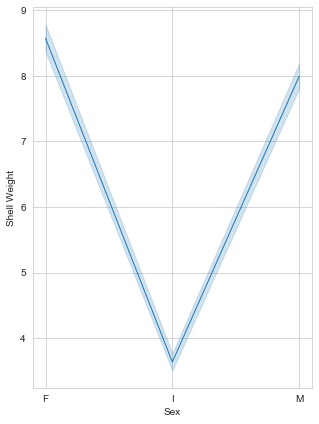

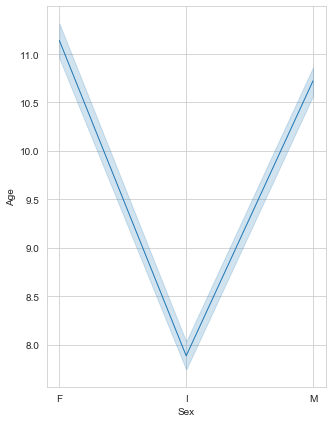

In [105]:
for i in ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']:
    plt.figure(figsize=(5,7))
    sns.lineplot(x=df.Sex,y=df[i],data=df,linewidth=1)
    plt.show()

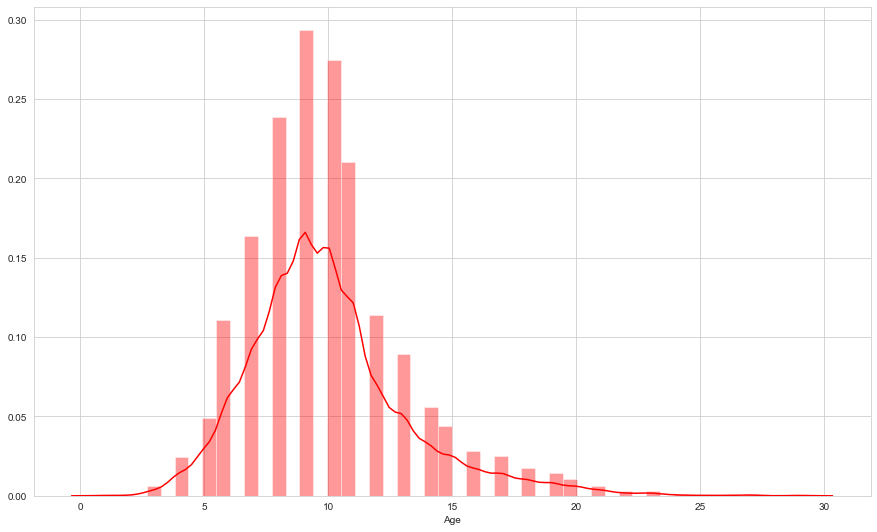

In [110]:
plt.figure(figsize=(15,9))
sns.distplot(df['Age'],color='red')

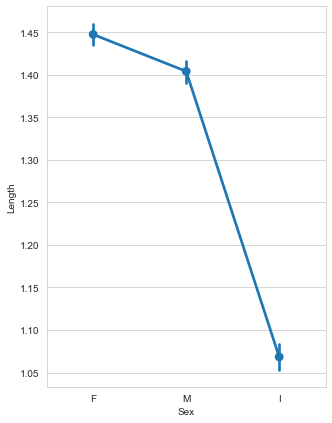

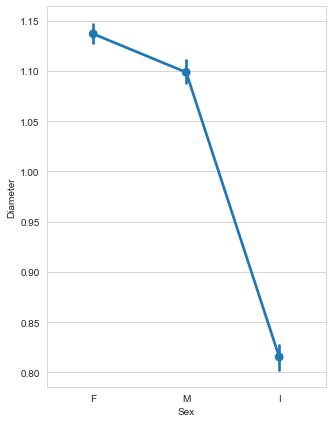

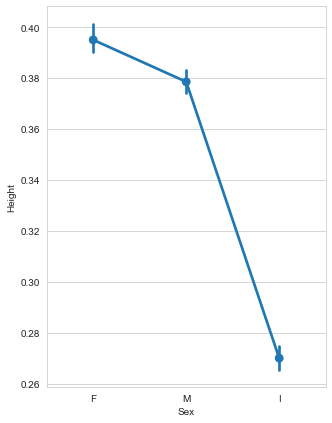

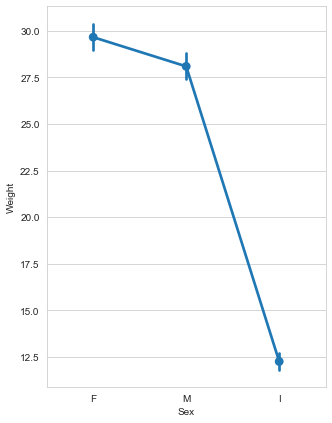

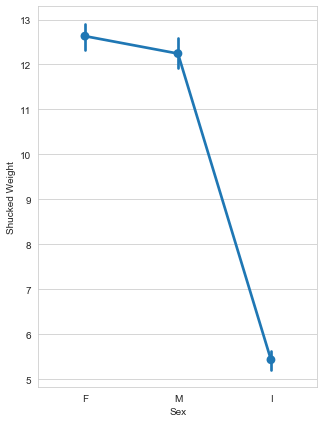

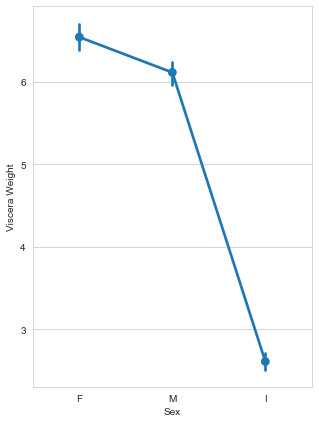

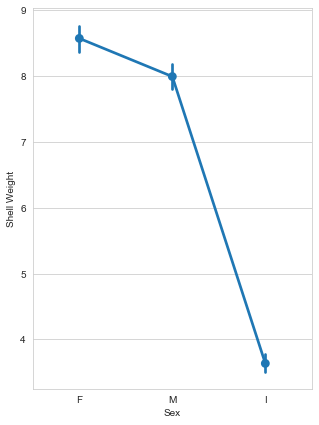

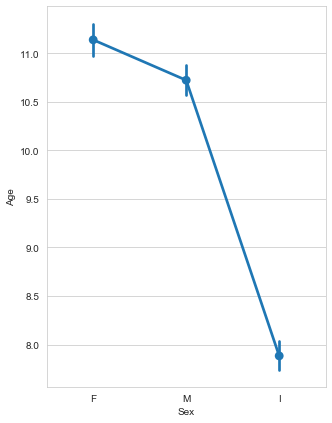

In [111]:
for i in ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']:
    plt.figure(figsize=(5,7))
    sns.pointplot(x=df.Sex,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 360x504 with 0 Axes>

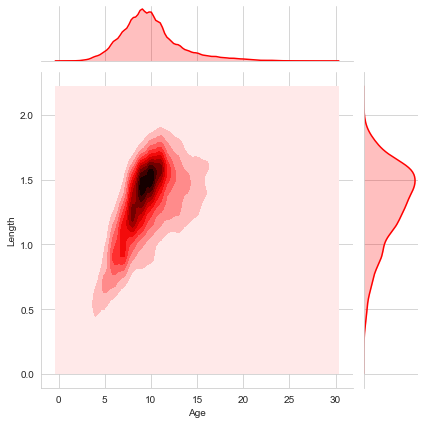

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 360x504 with 0 Axes>

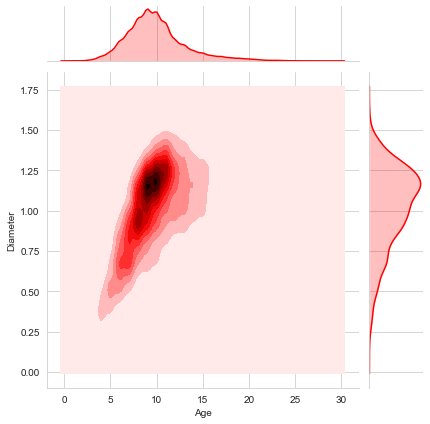

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 360x504 with 0 Axes>

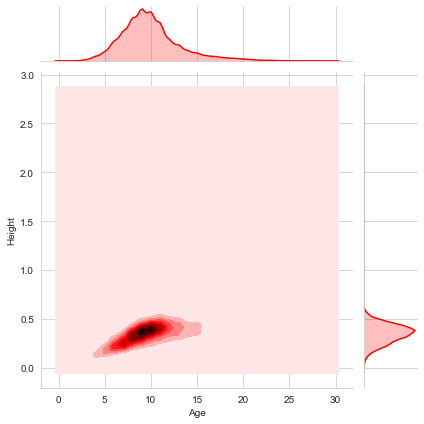

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 360x504 with 0 Axes>

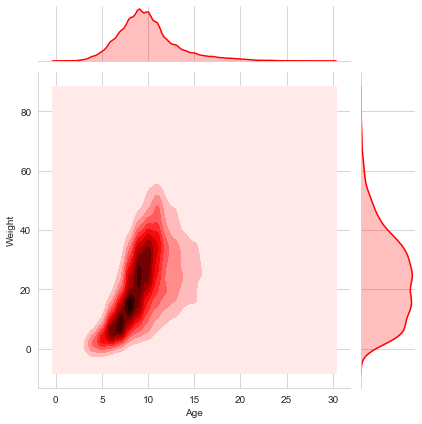

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 360x504 with 0 Axes>

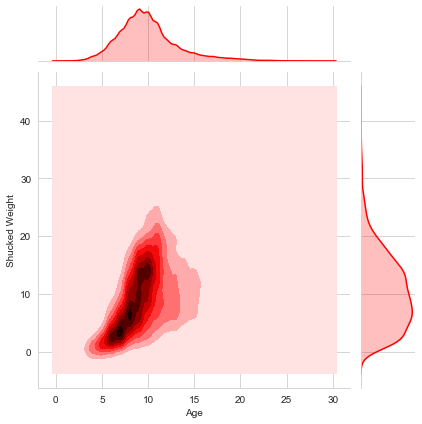

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 360x504 with 0 Axes>

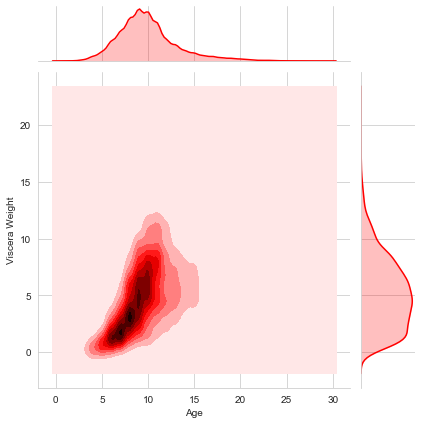

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 360x504 with 0 Axes>

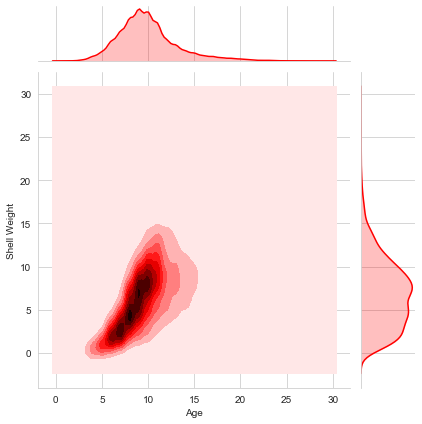

In [115]:
for i in ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']:
    plt.figure(figsize=(5,7))
    sns.jointplot(x=df.Age,y=df[i],data=df,kind='kde',color='red',linewidth=1)
    
    plt.show()

In [116]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Age by Shucked Weight,Age by Viscera Weight,Age by Shell Weight
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0,0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,1,2,2
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,2,2
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,1,1
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,2,2


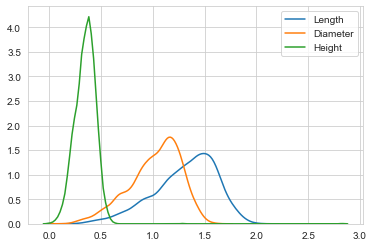

In [117]:
sns.kdeplot(df['Length'])
sns.kdeplot(df['Diameter'])
sns.kdeplot(df['Height'])

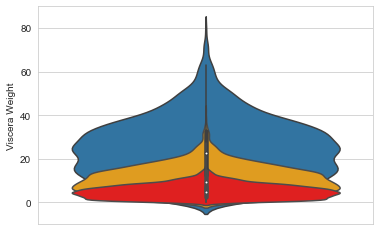

In [118]:
sns.violinplot(y="Weight",data=df)
sns.violinplot(y="Shucked Weight",data=df,color='orange')
sns.violinplot(y="Viscera Weight",data=df,color='red')

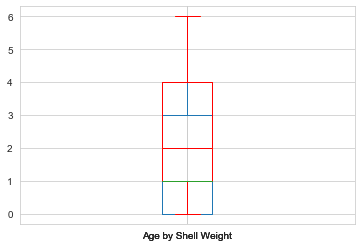

In [119]:
df.boxplot(column="Age by Shucked Weight")
df.boxplot(column="Age by Viscera Weight",color='orange')
df.boxplot(column="Age by Shell Weight",color='red')

In [120]:
import sweetviz as sv

In [121]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [122]:
from IPython.display import IFrame

In [123]:
IFrame(src='Analyze.html',width=1000,height=600)

In [124]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [125]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Age by Shucked Weight',
       'Age by Viscera Weight', 'Age by Shell Weight'],
      dtype='object')

In [126]:
man=MinMaxScaler()
feat=[ 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0.675676,0.697479,0.146018,0.307066,0.291863,0.258723,0.235675,0.285714
1,0.378378,0.344538,0.075221,0.066761,0.053800,0.063199,0.053313,0.178571
2,0.459459,0.428571,0.088496,0.098636,0.075992,0.073733,0.095665,0.178571
3,0.533784,0.504202,0.088496,0.167700,0.111970,0.105332,0.182860,0.321429
4,0.378378,0.352941,0.075221,0.085532,0.081372,0.068466,0.058296,0.178571
...,...,...,...,...,...,...,...,...
3888,0.689189,0.672269,0.115044,0.309368,0.275723,0.271231,0.222720,0.250000
3889,0.736486,0.722689,0.154867,0.429786,0.365837,0.332456,0.342302,0.321429
3890,0.236486,0.218487,0.057522,0.024438,0.017485,0.023700,0.020927,0.142857
3891,0.472973,0.428571,0.092920,0.128564,0.106254,0.107966,0.103139,0.178571


In [127]:
std=StandardScaler()
feat=[ 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0.420099,0.620895,0.601415,0.076925,0.338625,0.144441,-0.012342,-0.296468
1,-1.410841,-1.494328,-1.304023,-1.307952,-1.260829,-1.211958,-1.328119,-1.227985
2,-0.911494,-0.990703,-0.946754,-1.124255,-1.111727,-1.138886,-1.022543,-1.227985
3,-0.453759,-0.537441,-0.946754,-0.726243,-0.870002,-0.919670,-0.393414,0.014038
4,-1.410841,-1.443965,-1.304023,-1.199775,-1.075582,-1.175422,-1.292169,-1.227985
...,...,...,...,...,...,...,...,...
3888,0.503324,0.469808,-0.232215,0.090192,0.230187,0.231214,-0.105813,-0.606974
3889,0.794610,0.771983,0.839594,0.784161,0.835630,0.655944,0.756992,0.014038
3890,-2.284700,-2.249764,-1.780383,-1.551862,-1.504814,-1.485978,-1.561796,-1.538491
3891,-0.828269,-0.990703,-0.827664,-0.951783,-0.908407,-0.901402,-0.968617,-1.227985
